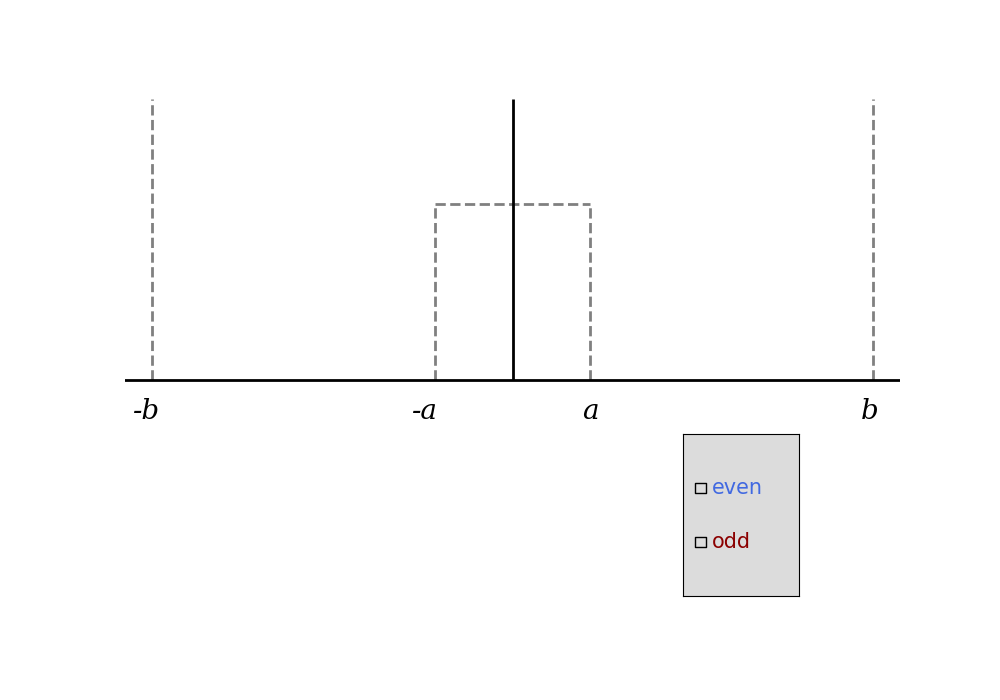

In [1]:
# python libraries
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.widgets import CheckButtons

def phi(x,a,b):
    
    k1 = 1/(a+b)
    k2 = 1/(a-b)
    #phi1 = np.sin(np.pi*(a+b-x)*k1)
    phi1 = np.sin(np.pi*x*k1-a)+np.cos(np.pi*x*k1-a)
    phi2_even = np.cosh(np.pi*x*k2)
    phi2_odd = np.sinh(np.pi*x*k2*2.5)
    phi3 = np.sin(np.pi*x*k1+a)-np.cos(np.pi*x*k1+a)
    return phi1,phi2_even,phi2_odd,phi3


def plot_even(vis):
    even = {"color":"royalblue","linewidth" : 2.5}
    ax.plot(x_left,-phi1_left,**even,visible = vis)
    ax.plot(x_right,phi1_right, **even,visible = vis)
    ax.plot(x_barrier,phi_even*0.9-0.24,**even,visible = vis)
    ax.text(-2.9,1.27,r"$\psi_e$",c = "royalblue",fontsize = 25,visible = vis)
    

def plot_odd(vis):
    odd = {"color":"darkred","linewidth" : 2.5, "linestyle":"--"}
    ax.plot(x_left,phi1_left+1.31,**odd,visible = vis)
    ax.plot(x_right,phi1_right,**odd,visible = vis)
    ax.plot(x_barrier,-phi_odd*0.085+0.66, **odd,visible = vis)
    ax.text(-2.9,0.0,r"$\psi_o$",c = "darkred",fontsize = 25,visible = vis)

a = 1
b = 5
xlim = 4.65

x = np.linspace(-xlim,xlim,500)
x_right = np.linspace(a,xlim,100*(b-a))
x_left = np.linspace(-xlim,-a,100*(b-a))
x_barrier = np.linspace(-a,a,100*a*2) 
phi1_left= phi(x_left,a,b)[0]
phi1_right = phi(x_right,a,b)[3]
phi_even = phi(x_barrier,a,b)[1]
phi_odd = phi(x_barrier,a,b)[2]

fig,ax = plt.subplots(figsize =(10,7))


lines = {"linewidth":2, "color":"grey","linestyle":"--"}


ax.hlines(1.25, -a, a,**lines)
ax.vlines(xlim,0.66,1.6,**lines)
ax.vlines(-xlim,0.66,1.6,**lines)
ax.vlines(a,0.66,1.25,**lines)
ax.vlines(-a,0.66,1.25,**lines)
ax.hlines(0.66, -xlim-a, xlim+a, linewidth = 2, color="black")
ax.vlines(0,0.66,1.6, linewidth = 2, color = "black")

font = {'fontname':'serif',"fontstyle":"italic","fontsize":20,"c" : "black",}

ax.text(-4.9,0.53,r"-b",**font)
ax.text(-1.3,0.53,r"-a",**font)
ax.text(4.5,0.53,r"b",**font)
ax.text(0.9,0.53,r"a",**font)

rax  = ax.inset_axes([0.72, 0.05, 0.15, 0.3], facecolor='gainsboro')  
line_colors = ["royalblue","darkred"]
showing = [False,False]
check = CheckButtons(
    rax,
    labels = ["even","odd"],
    actives = [plot_even(showing[0]),plot_odd(showing[1])],
    label_props={'color': line_colors,"fontsize":[15,15]},
)


def callback(label):

    if label == "even":
        showing[0] = not showing[0]
 
    elif label == "odd":
        showing[1] = not showing[1]

    for l in list(ax.lines):
        l.remove()
    ax.texts[-1].remove()
    ax.texts[-1].remove()
    plot_even(showing[0])
    plot_odd(showing[1])


check.on_clicked(callback)

ax.set_xlim(-5,5)
ax.set_ylim(-0.15,1.65)

#if you want the edges of the plot to be black, uncomment ax.set_xticks and ax.set_yticks and comment ax.axis(["off"])

#ax.set_xticks([])
#ax.set_yticks([])
ax.axis('off')

plt.show()